# 3장. 신경망

https://github.com/WegraLee/deep-learning-from-scratch

이 코드의 내용은 Deep Learning from Scratch를 참고했음을 밝힙니다.

### 계단 함수 구현하기(p69)

In [1]:
# 이 구현은 단순하고 쉽지만, 인수 x는 실수(부동소수점)만 받아들입니다.
# 즉, step_function(3.0)은 되지만 넘파이 배열을 인수로 넣을 수는 없습니다.
# 가령 step_function(np.array([1.0, 2.0]))는 안 됩니다.

def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [2]:
def step_function(x):
    y = x>0
    return y.astype(np.int)

In [3]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
y = x>0
y

array([False,  True,  True])

In [5]:
y = y.astype(np.int)
y

array([0, 1, 1])

### 계단 함수의 그래프(p70)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

<Figure size 640x480 with 1 Axes>

### 시그모이드 함수 구현하기(p72)

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [9]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [10]:
1.0/t

array([1.        , 0.5       , 0.33333333])

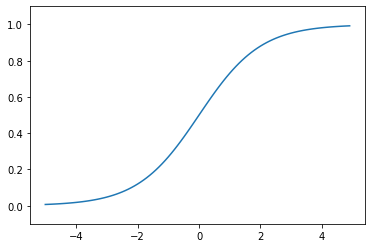

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### ReLU 함수(p76)

In [12]:
def relu(x):
    return np.maximum(0, x)

### 다차원 배열(p77)

In [13]:
# 1차원 배열

import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [14]:
np.ndim(A) # 배열의 차원 수

1

In [15]:
A.shape # 배열의 형상

(4,)

In [16]:
A.shape[0]

4

In [17]:
# 2차원 배열

B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [18]:
np.ndim(B)

2

In [19]:
B.shape

(3, 2)

### 행렬의 곱(p79)

In [20]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [21]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [22]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [23]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [24]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [25]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [26]:
C = np.array([[1,2],[3,4]])
C.shape

(2, 2)

In [27]:
A.shape

(2, 3)

In [28]:
np.dot(A,C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [29]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [30]:
B = np.array([7,8])
B.shape

(2,)

In [31]:
np.dot(A,B)

array([23, 53, 83])

### 신경망에서의 행렬 곱(p82)

In [32]:
X = np.array([1,2])
X.shape

(2,)

In [33]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [34]:
W.shape

(2, 3)

In [35]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


### 3층 신경망 구현하기(p83)

![image.png](https://i.imgur.com/jlp6Sy7.png)

In [36]:
# 입력층에서 1층으로 신호 전달

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2,3)
print(X.shape) # (2,)
print(B1.shape) # (3,)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [37]:
# 활성화 함수(시그모이드 함수)

Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [38]:
# 1층에서 2층으로의 신호 전달

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3,2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [39]:
# 2층에서 출력층으로의 신호 전달

def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

### 구현 정리(p89)

In [40]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]
